# TODO - should we take euclidian distance for envs like in GF?

<a id='home'></a>
### purpose

validate RONA using calculations from ../02_train_RONA.ipynb and the fitness matrix for the populations 
    
    - matrix has source pops as columns and transplant location as rows
    
    
### outline

1. [calculate performace](#calc)
    - calculate the performance (correlation between fitness and RONA) at specific gardens across source/transplanted populations
    - calculate the performance across gardens for each source population
    - calculate the slope of the linear regression of fitness ~ RONA
1. [create heatmaps](#heatmap)
    - visualize the performance within and across gardens, as well as slope of performance, with heatmaps
    - heatmaps use the simulated landscape coordinates of gardens or source pops to visualize performance across the landscape
1. [visualize environments](#vizenv)
    - visualize how the environment (temp_opt and sal_opt) changes across the landscape to compare with heatmaps

In [1]:
from pythonimports import *
from myfigs import save_pdf

import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.stats import linregress
from scipy.stats import ttest_rel

DIR = '/work/lotterhos/MVP-Offsets/practice_slim/'
slimdir = op.join(DIR, 'mypractice')
ronadir = op.join(DIR, 'training/RONA')
fig_dir = makedir(op.join(ronadir, 'figs'))

t1 = dt.now()  # notebook timer

lview,dview = get_client()

latest_commit()
session_info.show()

36 36
##################################################################
Current commit of pythonimports:
commit 357f2a9069d9ca25062146953c9bf88b70e863c0  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 3 10:42:21 2022 -0500
Today:	February 17, 2022 - 14:57:27
python version: 3.8.5
##################################################################



In [2]:
seed = '1231094'

In [3]:
# load fitness matrix

# an n_deme x n_deme table that indicates the mean fitness of individuals 
    # from the source deme (in columns) in the transplant deme (in rows) 
    
fitness = pd.read_table(op.join(slimdir, f'{seed}_fitnessmat.txt'),
                        delim_whitespace=True,
                        header=None)

# set column names for popID
fitness.columns = range(1, 101, 1)
fitness.index = range(1, 101, 1)

fitness.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.960262,0.97382,0.971241,0.965472,0.976714,0.970917,0.974427,0.953202,0.954027,0.975391,0.840556,0.85031,0.832841,0.839607,0.851942,0.857426,0.892363,0.846671,0.860698,0.811939,0.661158,0.647856,0.652199,0.66758,0.645116,0.640166,0.65026,0.62293,0.584976,0.586847,0.391638,0.432267,0.404119,0.407285,0.420622,0.388318,0.410114,0.394573,0.42217,0.385656,0.206587,0.233211,0.208592,0.216491,0.199549,0.226061,0.212617,0.208645,0.20138,0.238784,0.086771,0.091085,0.090922,0.093716,0.090747,0.08962,0.096573,0.092517,0.090039,0.098542,0.027133,0.037054,0.033264,0.033311,0.031134,0.035581,0.034004,0.036603,0.038191,0.034282,0.011827,0.011865,0.00902,0.010669,0.010409,0.010367,0.010115,0.008569,0.009158,0.012367,0.003637,0.002965,0.002782,0.00337,0.002928,0.002968,0.001892,0.00305,0.0033,0.002622,0.000337,0.000261,0.000369,0.000329,0.000424,0.000411,0.000632,0.000215,0.000317,0.000258
2,0.960262,0.97382,0.971241,0.965472,0.976714,0.970917,0.974427,0.953202,0.954027,0.975391,0.840556,0.85031,0.832841,0.839607,0.851942,0.857426,0.892363,0.846671,0.860698,0.811939,0.661158,0.647856,0.652199,0.66758,0.645116,0.640166,0.65026,0.62293,0.584976,0.586847,0.391638,0.432267,0.404119,0.407285,0.420622,0.388318,0.410114,0.394573,0.42217,0.385656,0.206587,0.233211,0.208592,0.216491,0.199549,0.226061,0.212617,0.208645,0.20138,0.238784,0.086771,0.091085,0.090922,0.093716,0.090747,0.08962,0.096573,0.092517,0.090039,0.098542,0.027133,0.037054,0.033264,0.033311,0.031134,0.035581,0.034004,0.036603,0.038191,0.034282,0.011827,0.011865,0.00902,0.010669,0.010409,0.010367,0.010115,0.008569,0.009158,0.012367,0.003637,0.002965,0.002782,0.00337,0.002928,0.002968,0.001892,0.00305,0.0033,0.002622,0.000337,0.000261,0.000369,0.000329,0.000424,0.000411,0.000632,0.000215,0.000317,0.000258
3,0.960262,0.97382,0.971241,0.965472,0.976714,0.970917,0.974427,0.953202,0.954027,0.975391,0.840556,0.85031,0.832841,0.839607,0.851942,0.857426,0.892363,0.846671,0.860698,0.811939,0.661158,0.647856,0.652199,0.66758,0.645116,0.640166,0.65026,0.62293,0.584976,0.586847,0.391638,0.432267,0.404119,0.407285,0.420622,0.388318,0.410114,0.394573,0.42217,0.385656,0.206587,0.233211,0.208592,0.216491,0.199549,0.226061,0.212617,0.208645,0.20138,0.238784,0.086771,0.091085,0.090922,0.093716,0.090747,0.08962,0.096573,0.092517,0.090039,0.098542,0.027133,0.037054,0.033264,0.033311,0.031134,0.035581,0.034004,0.036603,0.038191,0.034282,0.011827,0.011865,0.00902,0.010669,0.010409,0.010367,0.010115,0.008569,0.009158,0.012367,0.003637,0.002965,0.002782,0.00337,0.002928,0.002968,0.001892,0.00305,0.0033,0.002622,0.000337,0.000261,0.000369,0.000329,0.000424,0.000411,0.000632,0.000215,0.000317,0.000258
4,0.960262,0.97382,0.971241,0.965472,0.976714,0.970917,0.974427,0.953202,0.954027,0.975391,0.840556,0.85031,0.832841,0.839607,0.851942,0.857426,0.892363,0.846671,0.860698,0.811939,0.661158,0.647856,0.652199,0.66758,0.645116,0.640166,0.65026,0.62293,0.584976,0.586847,0.391638,0.432267,0.404119,0.407285,0.420622,0.388318,0.410114,0.394573,0.42217,0.385656,0.206587,0.233211,0.208592,0.216491,0.199549,0.226061,0.212617,0.208645,0.20138,0.238784,0.086771,0.091085,0.090922,0.093716,0.090747,0.08962,0.096573,0.092517,0.090039,0.098542,0.027133,0.037054,0.033264,0.033311,0.031134,0.035581,0.034004,0.036603,0.038191,0.034282,0.011827,0.011865,0.00902,0.010669,0.010409,0.010367,0.010115,0.008569,0.009158,0.012367,0.003637,0.002965,0.002782,0.00337,0.002928,0.002968,0.001892,0.00305,0.0033,0.002622,0.000337,0.000261,0.000369,0.000329,0.000424,0.000411,0.000632,0.000215,0.000317,0.000258
5,0.960262,0.97382,0.971241,0.965472,0.976714,0.970917,0.974427,0.953202,0.954027,0.975391,0.840556,0.85031,0.832841,0.839607,0.851942,0.857426,0.89236

In [4]:
# load scores from the Risk Of Non-Adaptedness (RONA)
    # from ../04_train_RONA.ipynb
rona = pklload(op.join(ronadir, f'{seed}_RONA_results.pkl'))
keys(rona)

['sal_opt', 'temp_opt']

<a id='calc'></a>
# calculate performance

[top](#home)

I want two types of heat maps

    - one that shows garden location and how well I could predict using all pops
    - another that shows how well I could predict a population in other gardens

In [5]:
# get coordinates for each population

subset = pd.read_table(op.join(slimdir, f'{seed}_Rout_ind_subset.txt'),
                       delim_whitespace=True)
subset.index = ('i' + subset['indID'].astype(str)).tolist()  # this will match to the 'causal' file
subset['sample_name'] = subset.index.tolist()

print(f'{nrow(subset) = }')

locations = subset.groupby('subpop')[['x', 'y']].apply(np.mean)
locations.head()

nrow(subset) = 1000


,x,y
subpop,,
1,1.0,1.0
2,2.0,1.0
3,3.0,1.0
4,4.0,1.0
5,5.0,1.0


In [6]:
# get envdata per pop
envdata = subset.groupby('subpopID')[['sal_opt', 'temp_opt']].apply(np.mean)
envdata

,sal_opt,temp_opt
subpopID,,
1,-1.000000,-1.0
2,-0.777778,-1.0
3,-0.555556,-1.0
4,-0.333333,-1.0
5,-0.111111,-1.0
...,...,...
96,0.111111,1.0
97,0.333333,1.0
98,0.555556,1.0


In [7]:
def test(val, add=0):
    return val + 5 + add

pd.Series(range(5)).apply(test, add=5)

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [8]:
norm = Normalize(vmin=-1.0, vmax=1.0)

def color(val, env=None, cmap=None):
    """Return rgb on colormap `cmap`."""
    return cmap(norm(val))[:3]

def fig_setup():
    """Get figure position (order) of each population on a 10x10 subplot."""
    count = 0
    figpos = {}
    for y in reversed(range(1,11,1)):
        for x in range(1,11,1):
            pop = locations[(locations['x']==x) & (locations['y']==y)].index[0]
            figpos[count] = pop
            count += 1
            
    # set up big fig
    fig, axes = plt.subplots(10, 10,
                             sharex='all',
                             sharey='all',
                             figsize=(15, 10))
    return figpos, fig, axes

def garden_performance_scatter(offset, fitness, env):
    figpos, fig, axes = fig_setup()
    
    # color for the environment (temp_opt) of source_pop - TODO: infer selected envs from data
    colormap = 'Reds' if env=='temp_opt' else 'Blues_r'
    cmap = plt.cm.get_cmap(colormap)
    cols = offset.columns.map(envdata[env]).to_series().apply(color, env=env, cmap=cmap).tolist()
    
    # create each of the population subfigures in the order matplotlib puts them into the figure
    for subplot,ax in enumerate(axes.flat):
        garden = figpos[subplot]  # which garden now?
        ax.scatter(offset.loc[garden],
                   fitness.loc[garden],
                   c=cols)
        # decide if I need to label longitude (x) or latitude (y) axes
        x,y = locations.loc[garden]  
        if subplot in range(0, 110, 10):
            ax.set_ylabel(int(y))
        if subplot in range(90, 101, 1):
            ax.set_xlabel(int(x))
            
    # set colorbar
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes[:,:])
    cbar.ax.set_title(env)
    
    fig.supylabel('fitness')
    fig.supxlabel('predicted offset')
    fig.suptitle(f'{seed}\nRONA garden performance for {env}\ntransplanted pops colored by home environment')
    
    save_pdf(
        op.join(fig_dir, f'{seed}_rona_garden_performance_scatter_{env}.pdf')
    )
    
    plt.show()
    
    pass

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/figs/1231094_rona_garden_performance_scatter_sal_opt.pdf


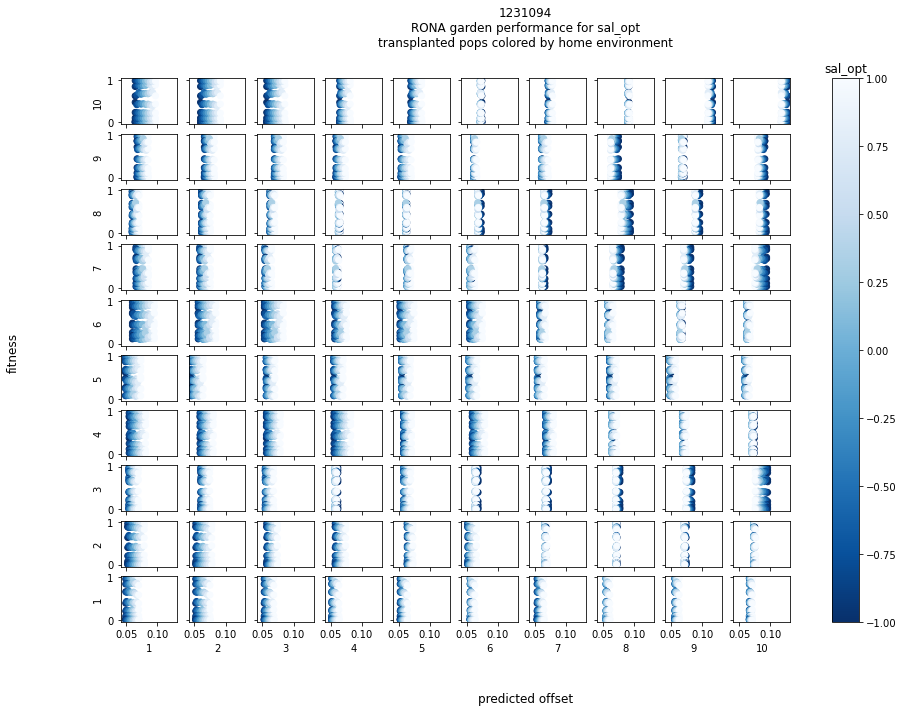

sal_opt population performance: 100%|███████████████| 100/100 [00:02<00:00, 36.15it/s]


Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/figs/1231094_rona_garden_performance_scatter_temp_opt.pdf


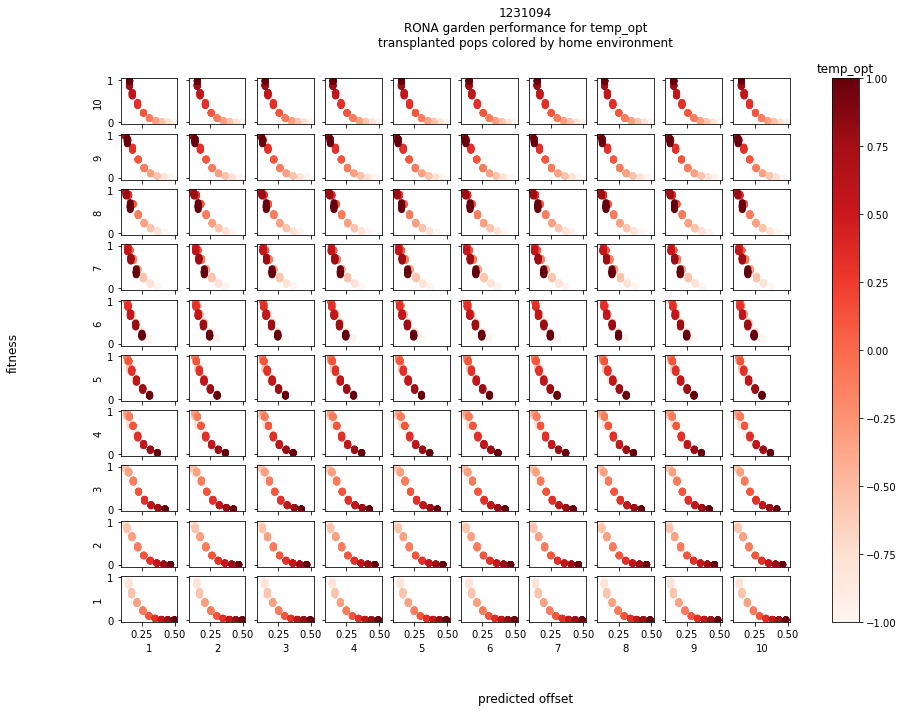

temp_opt population performance: 100%|███████████████| 100/100 [00:02<00:00, 36.05it/s]


In [9]:
garden_performance = defaultdict(dict)  # performance within gardens across transplant pops
source_performance = defaultdict(dict)  # performance for transplant pops across gardens

garden_slopes = defaultdict(dict)  # slope of relationship between fitness and RONA
source_slopes = defaultdict(dict)  # slope of relationship between fitness and RONA

for env in keys(rona):
    # plot performance
    ronadf = pd.DataFrame(rona[env])
    garden_performance_scatter(ronadf, fitness, env)
    
    
    # garden performance
    for garden in pbar(fitness.index, desc=f'{env} garden performance'):
        # retrieve rona for this garden
        ronadata = pd.Series(rona[env][garden], dtype=float)
        
        # record squared spearman's rho
        garden_performance[env][garden] = ronadata.corr(fitness.loc[garden],
                                                        method='spearman') ** 2
        # record slope
        garden_slopes[env][garden] = linregress(ronadata, fitness.loc[garden]).slope


    # population performance
    for source_pop in pbar(fitness.columns, desc=f'{env} population performance'):
        # retrieve rona for this pop
        ronadata = pd.Series(dtype=float)
        for garden in rona[env]:
            ronadata.loc[garden] = rona[env][garden][source_pop]
        
        # record squared spearman's rho
        source_performance[env][source_pop] = ronadata.corr(fitness[source_pop],
                                                            method='spearman') ** 2
        
        # record slope
        source_slopes[env][source_pop] = linregress(ronadata, fitness[source_pop]).slope

<a id='heatmap'></a>
# create heatmaps

[top](#home)

<a id='dumb'>

In [10]:
def blank_dataframe():
    """Create a defaultdict with default being a blankblank dataframe (landscape map) filled with NaN,
    columns and index are subpopIDs.
    
    Notes
    -----
    instantiating with dtype=float is necessary for sns.heatmap (otherwise sns.heatmap(df.astype(float)))
    """
    df_dict = defaultdict(lambda: pd.DataFrame(columns=range(1, 11, 1),
                                               index=reversed(range(1,11,1)),  # so that x=1,y=10 is in top left
                                               dtype=float))
    return df_dict

# show example, where 'hi' is just a dummy env
blank_dataframe()['hi']

,1,2,3,4,5,6,7,8,9,10
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# create empty dataframes to fill in as heatmaps
garden_heat = blank_dataframe()
garden_slope_heat = blank_dataframe()
source_heat = blank_dataframe()
source_slope_heat = blank_dataframe()

# fill out heat maps
for env in source_performance.keys():
    for source_pop,performance in source_performance[env].items():
        x,y = locations.loc[source_pop]
        
        # fill out source_heat
        source_heat[env].loc[y, x] = performance
        
        # fill out garden_heat
        garden_heat[env].loc[y, x] = garden_performance[env][source_pop]
        
        # fill out source_slope
        source_slope_heat[env].loc[y, x] = source_slopes[env][source_pop]
        
        # fill out garden slope
        garden_slope_heat[env].loc[y, x] = garden_slopes[env][source_pop]

##### performance heatmaps

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_performance_heatmap-sal_opt.pdf


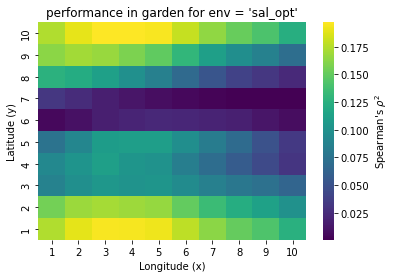

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_performance_heatmap-temp_opt.pdf


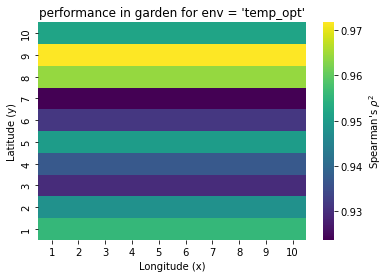

In [12]:
# show the perforance across pops for each garden
for env,heatmap in garden_heat.items():
    _ = sns.heatmap(heatmap,
                    cmap='viridis',
                    cbar_kws={'label': "Spearman's $\\rho^2$"})
    
    plt.title(f'performance in garden for {env = }')
    plt.xlabel('Longitude (x)')
    plt.ylabel('Latitude (y)')
    
    save_pdf(op.join(ronadir, f'{seed}_garden_performance_heatmap-{env}.pdf'))
    
    plt.show()

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_performance_heatmap-sal_opt.pdf


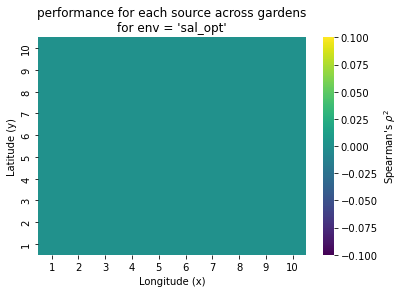

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_performance_heatmap-temp_opt.pdf


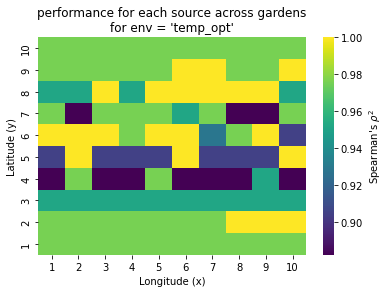

In [13]:
# show the perforance across gardens for each source
for env,heatmap in source_heat.items():
    _ = sns.heatmap(heatmap,
                    cmap='viridis',
                    cbar_kws={'label': "Spearman's $\\rho^2$"})
    
    plt.title(f'performance for each source across gardens\nfor {env = }')
    plt.xlabel('Longitude (x)')
    plt.ylabel('Latitude (y)')
    
    save_pdf(op.join(ronadir, f'{seed}_source_performance_heatmap-{env}.pdf'))
    
    plt.show()

##### slope heatmaps

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_slope_heatmap-sal_opt.pdf


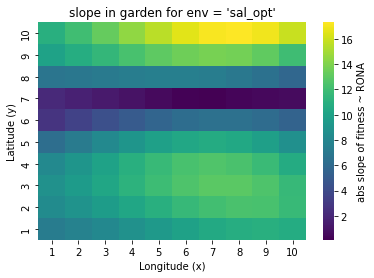

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_slope_heatmap-temp_opt.pdf


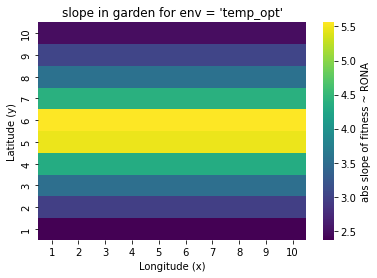

In [14]:
# slope of relationship between fitness ~ RONA at each garden for each env
for env,heatmap in garden_slope_heat.items():
    _ = sns.heatmap(heatmap.abs(),
                    cmap='viridis',
                    cbar_kws={'label': "abs slope of fitness ~ RONA"})
    plt.title(f'slope in garden for {env = }')
    plt.xlabel('Longitude (x)')
    plt.ylabel('Latitude (y)')
    
    save_pdf(op.join(ronadir, f'{seed}_garden_slope_heatmap-{env}.pdf'))
    
    plt.show()

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_slope_heatmap-sal_opt.pdf


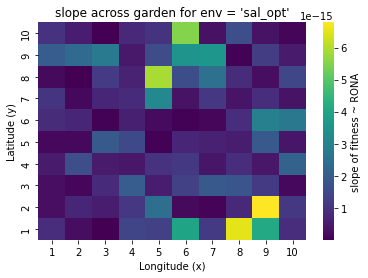

Saved to:  /work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_slope_heatmap-temp_opt.pdf


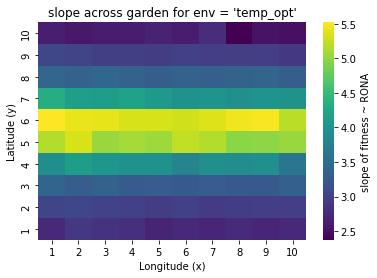

In [15]:
# slope of performance for each source pop across gardens
for env,heatmap in source_slope_heat.items():
    _ = sns.heatmap(heatmap.abs(),
                    cmap='viridis',
                    cbar_kws={'label': "slope of fitness ~ RONA"})
    plt.title(f'slope across garden for {env = }')
    plt.xlabel('Longitude (x)')
    plt.ylabel('Latitude (y)')
    
    save_pdf(op.join(ronadir, f'{seed}_source_slope_heatmap-{env}.pdf'))
    
    plt.show()

##### save 

In [16]:
# save heatmap objects
for env,heatmap in source_heat.items():
    heatfile = op.join(ronadir, f'{seed}_source_performance_heatmap-{env}.txt')
    heatmap.to_csv(heatfile, sep='\t', index=True)
    print(heatfile)
    
print('\n')
    
for env,heatmap in garden_heat.items():
    heatfile = op.join(ronadir, f'{seed}_garden_performance_heatmap-{env}.txt')
    heatmap.to_csv(heatfile, sep='\t', index=True)
    print(heatfile)
    
print('\n')
    
for env,heatmap in source_slope_heat.items():
    heatfile = op.join(ronadir, f'{seed}_source_slope_heatmap-{env}.txt')
    heatmap.to_csv(heatfile, sep='\t', index=True)
    print(heatfile)
    
print('\n')
    
for env,heatmap in garden_slope_heat.items():
    heatfile = op.join(ronadir, f'{seed}_garden_slope_heatmap-{env}.txt')
    heatmap.to_csv(heatfile, sep='\t', index=True)
    print(heatfile)

/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_performance_heatmap-sal_opt.txt
/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_performance_heatmap-temp_opt.txt


/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_performance_heatmap-sal_opt.txt
/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_performance_heatmap-temp_opt.txt


/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_slope_heatmap-sal_opt.txt
/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_source_slope_heatmap-temp_opt.txt


/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_slope_heatmap-sal_opt.txt
/work/lotterhos/MVP-Offsets/practice_slim/training/RONA/1231094_garden_slope_heatmap-temp_opt.txt


<a id='vizenv'></a>
# visualize environments

(as in ../03_validate_gradient_forests)

[top](#home)

In [17]:
# get population-level environmental data
envdata = subset.groupby('subpopID')[['sal_opt', 'temp_opt']].apply(np.mean)
envdata

,sal_opt,temp_opt
subpopID,,
1,-1.000000,-1.0
2,-0.777778,-1.0
3,-0.555556,-1.0
4,-0.333333,-1.0
5,-0.111111,-1.0
...,...,...
96,0.111111,1.0
97,0.333333,1.0
98,0.555556,1.0


In [18]:
# map samp to subpopID
samppop = dict(zip(subset.index, subset['subpopID']))

sal_opt
<class 'matplotlib.axes._subplots.AxesSubplot'>


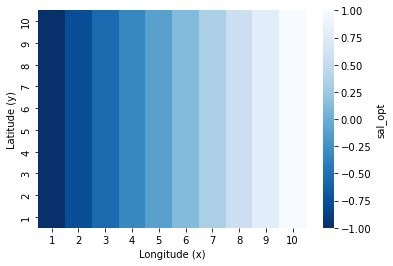

temp_opt
<class 'matplotlib.axes._subplots.AxesSubplot'>


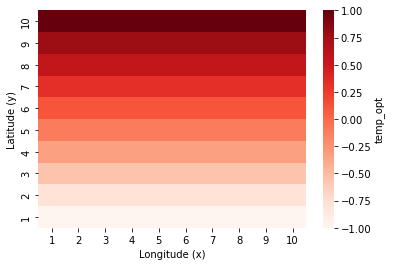

In [19]:
envdfs = blank_dataframe()
envheats = {}
for env in envdata.columns:
    print(ColorText(env).bold().green())
    
    if env == 'sal_opt':
        colormap = 'Blues_r'
    else:
        colormap = 'Reds'
    
    for samp,pop in samppop.items():
        x, y = locations.loc[pop]
        envdfs[env].loc[y, x] = envdata[env].loc[pop]
        
    envheats[env] = sns.heatmap(envdfs[env],
                                cbar_kws={'label': env}, cmap=colormap)
    plt.xlabel('Longitude (x)')
    plt.ylabel('Latitude (y)')
    print(type(envheats[env]))
    plt.show()

# which env was sig different according to t test?

Rellstab et al. 2016 use a t-test to determine which future environments are significantly different than current, and then uses the top 3/5 (ranked by p-values) to estimate RONA

Out of curiosity, and since temp_opt was the env under selection, what would I have got if I tried to pick the env(s) to use?

In [20]:
# t,p = ttest_rel(gardendata[env], envdf[env])

In [21]:
# get pop env data
envdata = subset.groupby('subpop')[['x', 'y', 'sal_opt', 'temp_opt']].apply(np.mean)
envdata.head()

,x,y,sal_opt,temp_opt
subpop,,,,
1,1.0,1.0,-1.000000,-1.0
2,2.0,1.0,-0.777778,-1.0
3,3.0,1.0,-0.555556,-1.0
4,4.0,1.0,-0.333333,-1.0
5,5.0,1.0,-0.111111,-1.0


In [22]:
Counter(envdata['temp_opt'])

Counter({-1.0: 10,
         -0.7777779999999999: 10,
         -0.555556: 10,
         -0.33333300000000005: 10,
         -0.11111099999999999: 10,
         0.11111099999999999: 10,
         0.33333300000000005: 10,
         0.555556: 10,
         0.7777779999999999: 10,
         1.0: 10})

In [23]:
Counter(envdata['sal_opt'])

Counter({-1.0: 10,
         -0.7777779999999999: 10,
         -0.555556: 10,
         -0.33333300000000005: 10,
         -0.11111099999999999: 10,
         0.11111099999999999: 10,
         0.33333300000000005: 10,
         0.555556: 10,
         0.7777779999999999: 10,
         1.0: 10})

In [24]:
# this shows that sometimes temp_opt was not significantly different between some gardens and transplant pops
for garden in envdata.index:
    df = blank_dataframe()
    for env in ['sal_opt', 'temp_opt']:
        gardendata = pd.Series(
            [envdata.loc[garden, env]] * nrow(envdata)  # repeat value nrow times
        )
        t,p = ttest_rel(gardendata, envdata[env])
        if p > 0.05:
            print(garden, env, p)

5 sal_opt 0.08637943062896286
6 sal_opt 0.08637943062896286
15 sal_opt 0.08637943062896286
16 sal_opt 0.08637943062896286
25 sal_opt 0.08637943062896286
26 sal_opt 0.08637943062896286
35 sal_opt 0.08637943062896286
36 sal_opt 0.08637943062896286
41 temp_opt 0.08637943062896286
42 temp_opt 0.08637943062896286
43 temp_opt 0.08637943062896286
44 temp_opt 0.08637943062896286
45 sal_opt 0.08637943062896286
45 temp_opt 0.08637943062896286
46 sal_opt 0.08637943062896286
46 temp_opt 0.08637943062896286
47 temp_opt 0.08637943062896286
48 temp_opt 0.08637943062896286
49 temp_opt 0.08637943062896286
50 temp_opt 0.08637943062896286
51 temp_opt 0.08637943062896286
52 temp_opt 0.08637943062896286
53 temp_opt 0.08637943062896286
54 temp_opt 0.08637943062896286
55 sal_opt 0.08637943062896286
55 temp_opt 0.08637943062896286
56 sal_opt 0.08637943062896286
56 temp_opt 0.08637943062896286
57 temp_opt 0.08637943062896286
58 temp_opt 0.08637943062896286
59 temp_opt 0.08637943062896286
60 temp_opt 0.08637943

In [25]:
# how long to complete notebook?
formatclock(dt.now() - t1, exact=True)

'0-00:00:38'